In [22]:
import sys

sys.path.append("../src")

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.linalg import eigh
import sto_ng
import sto_ng_overlap_function
import h5py
import gaussian_overlap_function


importlib.reload(sto_ng)
importlib.reload(sto_ng_overlap_function)
importlib.reload(gaussian_overlap_function)
from sto_ng import *
from sto_ng_overlap_function import *
from gaussian_overlap_function import *

In [24]:
with h5py.File("sto_ng.h5", "r") as f:
    alphas = f["1s/sto-3g/alpha"][:]
    cs = f["1s/sto-3g/c"][:]
alphas = np.array(alphas)
cs = np.array(cs)
cs_new = cs * (2 * alphas / np.pi) ** (3 / 4)

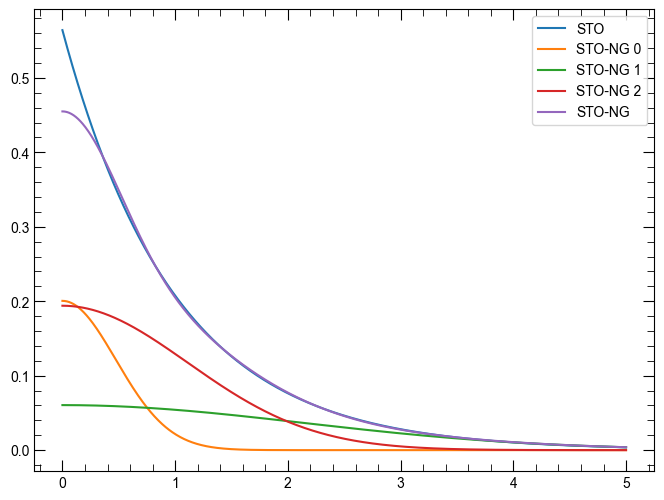

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.linspace(0, 5, 1000)
ax.plot(x, (1 / np.pi) ** (1 / 2) * np.exp(-x), label="STO")
for i in range(len(alphas)):
    ax.plot(
        x,
        cs_new[i] * np.exp(-alphas[i] * x**2),
        label=f"STO-NG {i}",
    )
sto_ng = np.sum(cs_new * np.exp(-alphas * x[:, None] ** 2), axis=1)
ax.plot(x, sto_ng, label="STO-NG")
ax.legend()

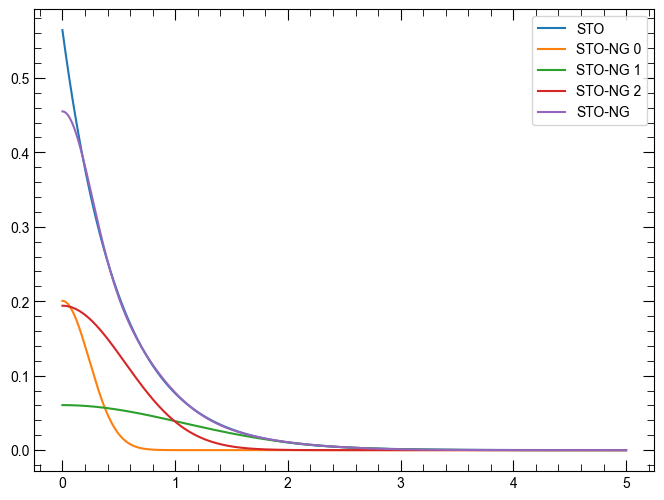

In [26]:
zeta = 2
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x = np.linspace(0, 5, 1000)
ax.plot(x, (1 / np.pi) ** (1 / 2) * np.exp(-zeta * x), label="STO")
for i in range(len(alphas)):
    ax.plot(
        x,
        cs_new[i] * np.exp(-alphas[i] * zeta**2 * x**2),
        label=f"STO-NG {i}",
    )
sto_ng = np.sum(cs_new * np.exp(-alphas * zeta**2 * x[:, None] ** 2), axis=1)
ax.plot(x, sto_ng, label="STO-NG")
ax.legend()

In [34]:
RA = np.array([0, 0, 0])
cs_new @ GaussianOverlapFunction.T(alphas[:, None], alphas[None, :], RA, RA) @ cs_new

0.4943056920792703

In [33]:
cs_new @ GaussianOverlapFunction.V(
    alphas[:, None], alphas[None, :], RA, RA, RA
) @ cs_new

-0.989216260257094

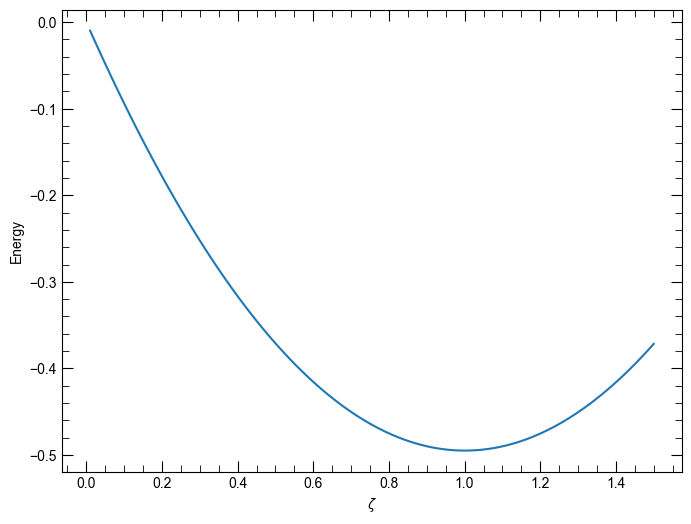

In [49]:
def energy(zeta):
    scaled_alphas = alphas * zeta**2
    kinetic = (
        cs_new
        @ GaussianOverlapFunction.T(
            scaled_alphas[:, None], scaled_alphas[None, :], RA, RA
        )
        @ cs_new
    )
    potential = (
        cs_new
        @ GaussianOverlapFunction.V(
            scaled_alphas[:, None], scaled_alphas[None, :], RA, RA, RA
        )
        @ cs_new
    )
    norm = (
        cs_new
        @ GaussianOverlapFunction.S(
            scaled_alphas[:, None], scaled_alphas[None, :], RA, RA
        )
        @ cs_new
    )
    return (kinetic + potential) / norm


zetas = np.linspace(0.01, 1.5, 100)
energy_values = [energy(zeta) for zeta in zetas]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(zetas, energy_values)
ax.set_xlabel(r"$\zeta$")
ax.set_ylabel("Energy")
plt.show()

In [50]:
minimize(energy, 1.0, method="Nelder-Mead")

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.4949107135086254
             x: [ 1.001e+00]
           nit: 10
          nfev: 20
 final_simplex: (array([[ 1.001e+00],
                       [ 1.001e+00]]), array([-4.949e-01, -4.949e-01]))